# Analysis of Data Science Salaries

Data from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing Data

In [7]:
data = pd.read_csv("data/ds_salaries.csv")
data.pop("Unnamed: 0")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [27]:
def remote_status(value):
    """ Recreate the remote_ratio column with actual text instead of numeric representations
    
    Keyword Arguments:
        value (int) - value of remote_ratio column to convert
    """
    # remote_ratio value of 100 means fully remote, 50 means half remote, and 0 means no remote
    conversion = {100:"Remote", 50:"Hybrid", 0:"On-Site"}
    
    return conversion.get(value) if value in conversion.keys() else None

In [28]:
data["remote_status"] = data["remote_ratio"].map(remote_status)

In [24]:
def experience_level_expanded(value):
    
    conversion = {"EN":"Entry level", "MI":"Middle level", "SE":"Senior level", "EX":"Executive level"}
    
    return conversion.get(value) if value in conversion.keys() else None

In [25]:
data["experience_level_expanded"] = data["experience_level"].map(experience_level_expanded)

In [30]:
def job_type(value):
    if("Scientist" in value):
        return "Scientist"
    elif("Analyst" in value):
        return "Analyst"
    elif("Engineer" in value):
        return "Engineer"
    else:
        return "Other"

In [31]:
data["job_type"] = data["job_title"].map(job_type)

## Exploratory Analysis

### Categorical Value Counts

In [56]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.set_context("notebook", font_scale=1.5)

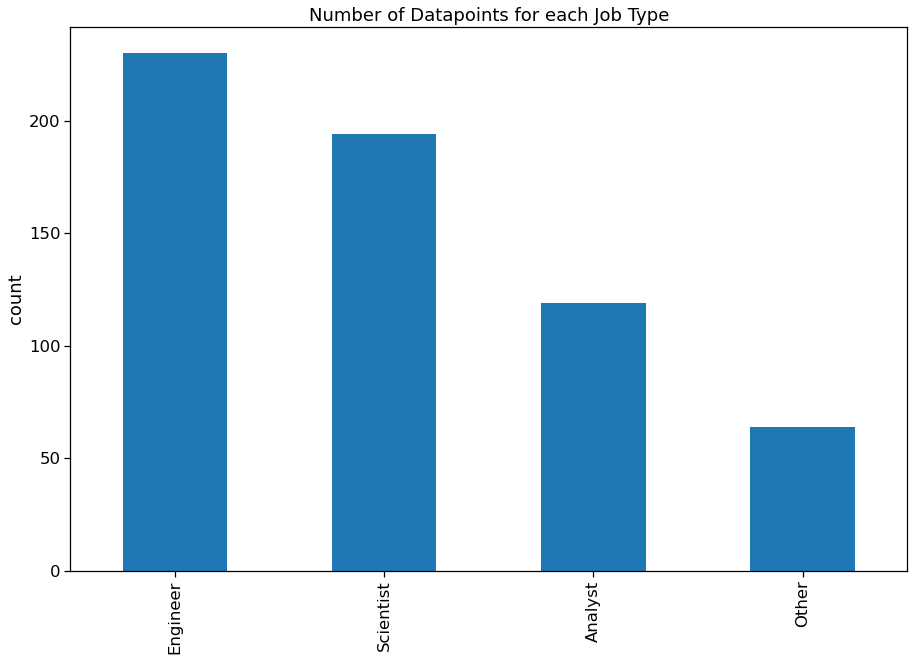

In [57]:
data["job_type"].value_counts().plot(kind="bar")
_ = plt.ylabel("count")
_ = plt.title("Number of Datapoints for each Job Type")

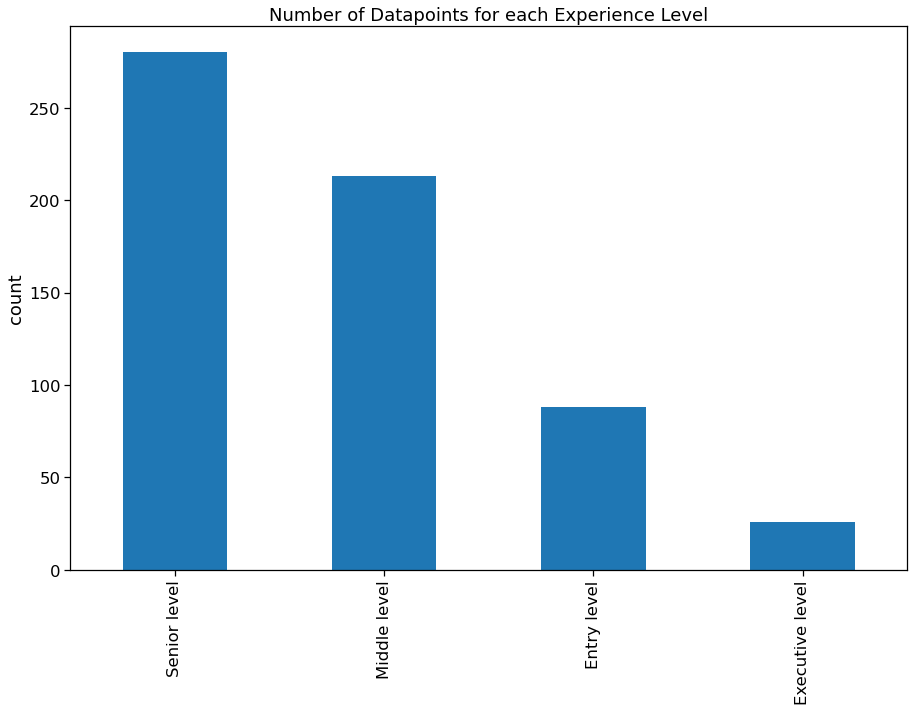

In [58]:
data["experience_level_expanded"].value_counts().plot(kind="bar")
_ = plt.ylabel("count")
_ = plt.title("Number of Datapoints for each Experience Level")

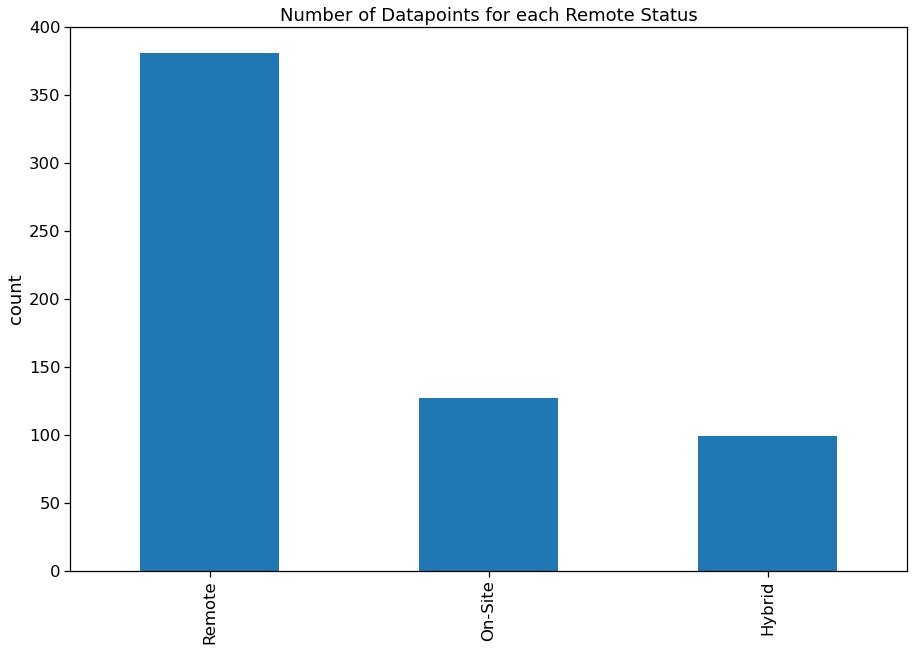

In [59]:
data["remote_status"].value_counts().plot(kind="bar")
_ = plt.ylabel("count")
_ = plt.title("Number of Datapoints for each Remote Status")